In [17]:
import matplotlib.pyplot as plot
import sklearn
from sklearn.datasets import  load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import numpy as np
%matplotlib inline

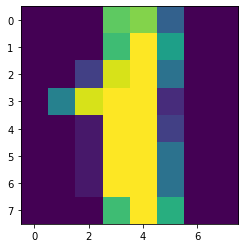

example image of number =  1


In [18]:
digits=load_digits()
plot.imshow(digits.data[1].reshape(8,8))
plot.show()
print('example image of number = ',digits.target[1])

In [19]:
X = digits.data
y = digits.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)

(1437, 64)


In [21]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_predict = lr.predict(X_test)
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9694444444444444


In [22]:
sklearn_pca = PCA(n_components=0.95)
sklearn_pca.fit(X_train)
print(X_train.shape)
X_train_transformed = sklearn_pca.transform(X_train)
print(X_train_transformed.shape)
print(X_test.shape)
X_test_transformed =sklearn_pca.transform(X_test)
print(X_test_transformed.shape)

(1437, 64)
(1437, 28)
(360, 64)
(360, 28)


In [23]:
sklearn_pca.explained_variance_

array([176.25219806, 162.27844722, 140.97668344, 103.55187264,
        70.38843868,  59.14843949,  51.1314358 ,  43.73488583,
        40.87599877,  36.77769212,  28.4836322 ,  26.70870056,
        21.96750616,  21.59897219,  18.03292618,  16.65025739,
        15.77968654,  14.90021201,  12.22895905,  11.29792946,
        10.71329183,   9.68812829,   9.19074224,   8.46335199,
         8.45761581,   7.08692941,   6.78470994,   6.09793341])

In [24]:
lr = LogisticRegression(penalty='l1')
lr.fit(X_train_transformed,y_train)
y_predict = lr.predict(X_test_transformed)
accuracy = accuracy_score(y_predict,y_test)
print(accuracy)

C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\rishy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9805555555555555


In [25]:
print(confusion_matrix(y_predict,y_test))

[[43  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  1  0 30  0  1  2  1]
 [ 0  1  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 35  0  0]
 [ 0  0  0  0  0  0  0  1 27  0]
 [ 0  0  0  0  0  0  0  0  0 33]]


5 , actual value = 9


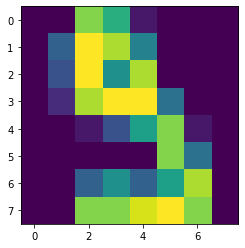

9
[5]
6 , actual value = 1


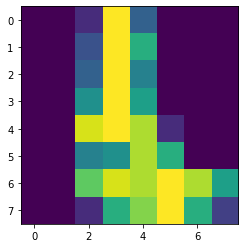

1
[6]
8 , actual value = 7


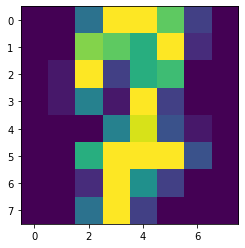

7
[8]
5 , actual value = 8


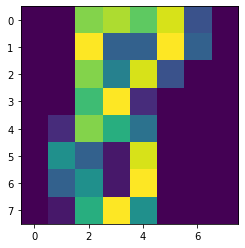

8
[5]
5 , actual value = 3


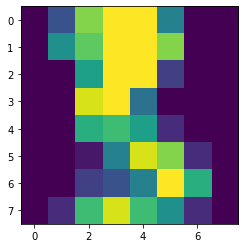

3
[5]
5 , actual value = 7


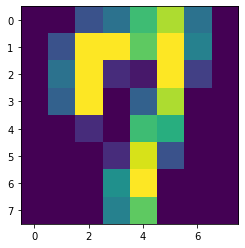

7
[5]
5 , actual value = 8


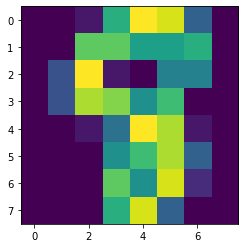

8
[5]


In [16]:
index=np.where(y_predict != y_test)
for p in index:
    for i in p:
        print(y_predict[i],",","actual value =", y_test[i])
        plot.imshow(X_test[i].reshape(8,8))
        plot.show()
        print(y_test[i])
        print(lr.predict(X_test_transformed[i].reshape(1,-1)))